### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from pandas import ExcelWriter
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

In [4]:
columnnames = ['NCD_0',
'NCD_1',
'NCD_2',
'NCD_3',
'NCD_4',
'NCD_5',
'NCD_6',
'AI_0',
'AI_1',
'AI_2',
'AI_3',
'AI_4',
'AI_5',
'AI_6',
'AS(NA)_0',
'AS(NA)_1',
'AS(NA)_2',
'AS(NA)_3',
'AS(NA)_4',
'AS(NA)_5',
'AS(NA)_6',
'BL_0',
'BL_1',
'BL_2',
'BL_3',
'BL_4',
'BL_5',
'BL_6',
'NAC_0',
'NAC_1',
'NAC_2',
'NAC_3',
'NAC_4',
'NAC_5',
'NAC_6',
'AS(NAC)_0',
'AS(NAC)_1',
'AS(NAC)_2',
'AS(NAC)_3',
'AS(NAC)_4',
'AS(NAC)_5',
'AS(NAC)_6',
'CS_0',
'CS_1',
'CS_2',
'CS_3',
'CS_4',
'CS_5',
'CS_6',
'AT_0',
'AT_1',
'AT_2',
'AT_3',
'AT_4',
'AT_5',
'AT_6',
'NA_0',
'NA_1',
'NA_2',
'NA_3',
'NA_4',
'NA_5',
'NA_6',
'ADL_0',
'ADL_1',
'ADL_2',
'ADL_3',
'ADL_4',
'ADL_5',
'ADL_6',
'NAD_0',
'NAD_1',
'NAD_2',
'NAD_3',
'NAD_4',
'NAD_5',
'NAD_6',
'NAD']

In [5]:
data = pd.read_table('Twitter.data', sep=',')

In [6]:
data

,0,2,0.1,0.2,1,1.1,1.2,0.3,1.3,0.4,...,1.000000.14,1.000000.15,0.12,2.2,0.13,0.14,1.14,1.15,1.16,0.0
0,2,1,0,0,0,0,4,2,1,0,...,0.000000,1.000000,2,1,0,0,0,0,4,0.5
1,1,0,0,0,0,4,1,1,0,0,...,1.000000,1.000000,1,0,0,0,0,4,1,0.0
2,1,0,0,1,0,0,1,1,0,0,...,0.000000,1.000000,1,0,0,1,0,0,1,2.5
3,0,1,0,0,1,2,3,0,1,0,...,1.000000,1.000000,0,1,0,0,1,2,3,0.5
4,1,0,0,1,2,3,0,1,0,0,...,1.000000,0.000000,1,0,0,1,2,3,0,1.0
5,1,0,0,0,2,0,2,1,0,0,...,0.000000,1.000000,1,0,0,0,2,0,2,0.0
6,0,2,0,0,0,1,1,0,2,0,...,1.000000,1.000000,0,2,0,0,0,1,1,2.0
7,2,0,0,0,1,1,2,2,0,0,...,1.000000,1.000000,2,0,0,0,1,1,2,1.0
8,0,1,1,2,2,0,3,0,1,1,...,0.000000,1.000000,0,1,1,2,2,0,3,0.5
9,1,1,2,2,0,3,1,1,1,2,...,1.000000,1.000000,1,1,2,2,0,3,1,0.5


In [8]:
data.columns = columnnames
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,NAD
count,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,...,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000
mean,140.339881,136.770378,159.679545,181.592402,201.097788,220.175747,219.388589,71.038172,69.829749,82.198344,...,1.136689,1.140372,140.790102,137.181502,160.106196,182.057752,201.596826,220.706276,219.937239,191.279821
std,431.772970,432.305464,502.057815,574.884157,630.448918,669.206442,672.182719,196.876865,202.199911,239.523223,...,1.432328,1.552315,432.625285,433.026946,502.774795,575.658466,631.258804,670.051490,673.033057,612.352828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091298,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583249 entries, 0 to 583248
Data columns (total 78 columns):
NCD_0        583249 non-null int64
NCD_1        583249 non-null int64
NCD_2        583249 non-null int64
NCD_3        583249 non-null int64
NCD_4        583249 non-null int64
NCD_5        583249 non-null int64
NCD_6        583249 non-null int64
AI_0         583249 non-null int64
AI_1         583249 non-null int64
AI_2         583249 non-null int64
AI_3         583249 non-null int64
AI_4         583249 non-null int64
AI_5         583249 non-null int64
AI_6         583249 non-null int64
AS(NA)_0     583249 non-null float64
AS(NA)_1     583249 non-null float64
AS(NA)_2     583249 non-null float64
AS(NA)_3     583249 non-null float64
AS(NA)_4     583249 non-null float64
AS(NA)_5     583249 non-null float64
AS(NA)_6     583249 non-null float64
BL_0         583249 non-null float64
BL_1         583249 non-null float64
BL_2         583249 non-null float64
BL_3         583249 non-null 

###### We can see that all the features are numerical values and there are no missing values either as mentioned explicitly in the dataset description. Hence there is no need of transformation of categorical variables as there are none. The last column NAD represents the value to be predicted

In [5]:
X = data.iloc[ : ,0:77]
y = data.iloc[ : ,77:78]

In [6]:
#For Model Selection we execute on 10% of the data
Dummytrain,sample_data,Dummytrain2,sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

#Saving the sample data - so that we can repeat
writer = ExcelWriter('SampleData.xlsx')
sample_data.to_excel(writer,'Sheet1')
writer.save()

writer = ExcelWriter('SampleTarget.xlsx')
sample_target.to_excel(writer,'Sheet1')
writer.save()

In [7]:
X = sample_data
y = sample_target

In [8]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
#We choose the MinMaxScaler to scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

X_full_scaled = scaler.fit_transform(X)

# Linear Regression

In [10]:
model_name = 'LinearRegression'

In [11]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
train_score = lreg.score(X_train, y_train)
test_score= lreg.score(X_test, y_test)

In [12]:
best_parameters = 'N/A'
report_table = [[model_name, best_parameters, train_score, test_score]]

report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
writer = ExcelWriter('RegressionReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression,N/A,0.943914,0.965617


In [13]:
#There is no hyper-parameter in Linear Regression hence no need of grid search

In [14]:
#Now we will cross validate the model with Best Parameters to see the model generalization
crossval_scores = cross_val_score(LinearRegression(), X_full_scaled, y, cv=5)
crossvalreport = [[model_name,best_parameters,crossval_scores[0],crossval_scores[1], crossval_scores[2],
                   crossval_scores[3], crossval_scores[4], crossval_scores.mean()]]

In [15]:
crossvalreportdf = pd.DataFrame(crossvalreport, columns=['Model', 'Best Parameters', 'Cross Val Score1', 'Cross Val Score2','Cross Val Score3','Cross Val Score4','Cross Val Score5', 'Mean CrossVal Score']).set_index('Model', drop=True)
crossvalreportdf

,Best Parameters,Cross Val Score1,Cross Val Score2,Cross Val Score3,Cross Val Score4,Cross Val Score5,Mean CrossVal Score
Model,,,,,,,
LinearRegression,N/A,0.943257,0.943529,0.964191,0.929229,0.931706,0.942382


In [16]:
writer = ExcelWriter('CrossValidationReport.xlsx')
crossvalreportdf.to_excel(writer,'Sheet1')
writer.save()

# Ridge Regression

In [17]:
model_name = 'RidgeRegression'

x_range = [0.001, 0.01, 0.1, 1, 5, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5,0,'$\\alpha$')

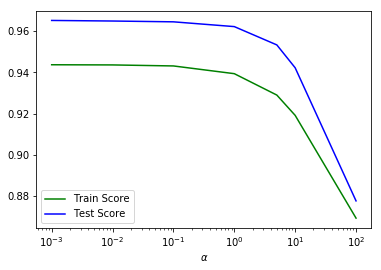

In [18]:
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [19]:
#Searching for the best parameter
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 5, 10, 100]}
ridge = Ridge()
gridsearch = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True, n_jobs=-1)

In [20]:
gridsearch.fit(X_train, y_train)
train_score = gridsearch.score(X_train, y_train)
test_score = gridsearch.score(X_test, y_test)

In [21]:
best_parameters = str(gridsearch.best_params_)
print("Best parameters: {}".format(gridsearch.best_params_))
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]


#Appending the model specific report
report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
writer = ExcelWriter('RegressionReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

Best parameters: {'alpha': 0.1}


,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression,N/A,0.943914,0.965617
RidgeRegression,{'alpha': 0.1},0.943151,0.964527


In [22]:
bestridgeparameter = gridsearch.best_params_['alpha']

In [23]:
#Now we will cross validate the model with Best Parameters to see the model generalization
crossval_scores = cross_val_score(Ridge(alpha=bestridgeparameter), X_full_scaled, y, cv=5)
crossvalreport = crossvalreport + [[model_name,best_parameters,crossval_scores[0],crossval_scores[1], crossval_scores[2],
                   crossval_scores[3], crossval_scores[4], crossval_scores.mean()]]

In [24]:
#This is the cross validation report
crossvalreportdf = pd.DataFrame(crossvalreport, columns=['Model', 'Best Parameters', 'Cross Val Score1', 'Cross Val Score2','Cross Val Score3','Cross Val Score4','Cross Val Score5', 'Mean CrossVal Score']).set_index('Model', drop=True)
crossvalreportdf

,Best Parameters,Cross Val Score1,Cross Val Score2,Cross Val Score3,Cross Val Score4,Cross Val Score5,Mean CrossVal Score
Model,,,,,,,
LinearRegression,N/A,0.943257,0.943529,0.964191,0.929229,0.931706,0.942382
RidgeRegression,{'alpha': 0.1},0.940950,0.940408,0.966779,0.927748,0.934547,0.942086


In [25]:
writer = ExcelWriter('CrossValidationReport.xlsx')
crossvalreportdf.to_excel(writer,'Sheet1')
writer.save()

# Lasso Regression

In [26]:
from sklearn.linear_model import Lasso

model_name = 'LassoRegression'

param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000]}
lasso = Lasso()
gridsearch = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True, n_jobs=-1)
gridsearch.fit(X_train, y_train)
train_score = gridsearch.score(X_train, y_train)
test_score = gridsearch.score(X_test, y_test)

In [27]:
best_parameters = str(gridsearch.best_params_)
print("Best parameters: {}".format(gridsearch.best_params_))
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]

#Appending the model specific report
report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
writer = ExcelWriter('RegressionReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

Best parameters: {'alpha': 0.01}


,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression,N/A,0.943914,0.965617
RidgeRegression,{'alpha': 0.1},0.943151,0.964527
LassoRegression,{'alpha': 0.01},0.942931,0.965217


Text(0.5,0,'$\\alpha$')

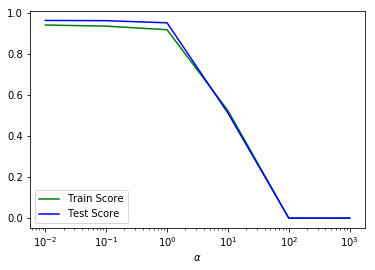

In [28]:
#Visually verifying the best parameters
alpha_range = [0.01, 0.1, 1, 10, 100, 1000]

train_score_list = []
test_score_list = []

for alpha in alpha_range:
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

plt.plot(alpha_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(alpha_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [29]:
bestlassoalpha = gridsearch.best_params_['alpha']

In [30]:
#Now we will cross validate the model with Best Parameters to see the model generalization
crossval_scores = cross_val_score(Lasso(alpha=bestlassoalpha), X_full_scaled, y, cv=5)
crossvalreport = crossvalreport + [[model_name,best_parameters,crossval_scores[0],crossval_scores[1], crossval_scores[2],
                   crossval_scores[3], crossval_scores[4], crossval_scores.mean()]]

In [31]:
#This is the cross validation report
crossvalreportdf = pd.DataFrame(crossvalreport, columns=['Model', 'Best Parameters', 'Cross Val Score1', 'Cross Val Score2','Cross Val Score3','Cross Val Score4','Cross Val Score5', 'Mean CrossVal Score']).set_index('Model', drop=True)
crossvalreportdf

,Best Parameters,Cross Val Score1,Cross Val Score2,Cross Val Score3,Cross Val Score4,Cross Val Score5,Mean CrossVal Score
Model,,,,,,,
LinearRegression,N/A,0.943257,0.943529,0.964191,0.929229,0.931706,0.942382
RidgeRegression,{'alpha': 0.1},0.940950,0.940408,0.966779,0.927748,0.934547,0.942086
LassoRegression,{'alpha': 0.01},0.941164,0.942607,0.968584,0.930204,0.935457,0.943603


In [32]:
writer = ExcelWriter('CrossValidationReport.xlsx')
crossvalreportdf.to_excel(writer,'Sheet1')
writer.save()

# Support Vector Regression

In [33]:
#Firstly working with Linear SVR
model_name = 'SupportVectorRegression'

#First doing linear SVR

regressor = LinearSVR()
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

gridsearch = GridSearchCV(regressor, param_grid, cv=5, return_train_score=True, n_jobs=-1)
gridsearch.fit(X_train, y_train)
train_score = gridsearch.score(X_train, y_train)
test_score = gridsearch.score(X_test, y_test)

In [34]:
best_parameters = str(gridsearch.best_params_)
print("Best parameters: {}".format(gridsearch.best_params_))
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]

#Appending the model specific report
report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
writer = ExcelWriter('RegressionReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

Best parameters: {'C': 1000}


,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression,N/A,0.943914,0.965617
RidgeRegression,{'alpha': 0.1},0.943151,0.964527
LassoRegression,{'alpha': 0.01},0.942931,0.965217
SupportVectorRegression,{'C': 1000},0.933516,0.957628


Text(0.5,0,'$\\alpha$')

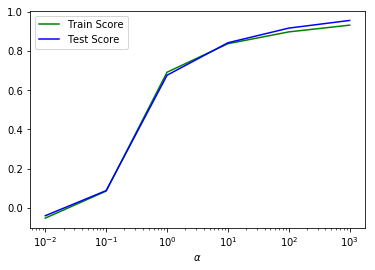

In [35]:
#Visualizing the best parameters for verification
C_range = [0.01, 0.1, 1, 10, 100, 1000]

train_score_list = []
test_score_list = []

for cvalue in C_range:
    regressor = LinearSVR(C=cvalue)
    regressor.fit(X_train,y_train)
    train_score_list.append(regressor.score(X_train,y_train))
    test_score_list.append(regressor.score(X_test, y_test))

plt.plot(C_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(C_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 2)
plt.xlabel(r'$\alpha$')

In [36]:
bestCforSVR = gridsearch.best_params_['C']

In [37]:
#Now we will cross validate the model with Best Parameters to see the model generalization
crossval_scores = cross_val_score(LinearSVR(C=bestCforSVR), X_full_scaled, y, cv=5)
crossvalreport = crossvalreport + [[model_name,best_parameters,crossval_scores[0],crossval_scores[1], crossval_scores[2],
                   crossval_scores[3], crossval_scores[4], crossval_scores.mean()]]

In [38]:
#This is the cross validation report
crossvalreportdf = pd.DataFrame(crossvalreport, columns=['Model', 'Best Parameters', 'Cross Val Score1', 'Cross Val Score2','Cross Val Score3','Cross Val Score4','Cross Val Score5', 'Mean CrossVal Score']).set_index('Model', drop=True)
crossvalreportdf

,Best Parameters,Cross Val Score1,Cross Val Score2,Cross Val Score3,Cross Val Score4,Cross Val Score5,Mean CrossVal Score
Model,,,,,,,
LinearRegression,N/A,0.943257,0.943529,0.964191,0.929229,0.931706,0.942382
RidgeRegression,{'alpha': 0.1},0.940950,0.940408,0.966779,0.927748,0.934547,0.942086
LassoRegression,{'alpha': 0.01},0.941164,0.942607,0.968584,0.930204,0.935457,0.943603
SupportVectorRegression,{'C': 1000},0.933420,0.922307,0.937302,0.900752,0.927230,0.924202


In [39]:
writer = ExcelWriter('CrossValidationReport.xlsx')
crossvalreportdf.to_excel(writer,'Sheet1')
writer.save()

# Kernel SVR

In [40]:
#Now working with Kernel SVC 

model_name = 'KernelSVR'

regressor = SVR(kernel='rbf')

param_grid = {'C':[0.01, 0.1, 1, 10], 'gamma':[0.1, 1.0, 10.0, 100]}

gridsearch = GridSearchCV(regressor, param_grid, cv=5, return_train_score=True, n_jobs=-1)
gridsearch.fit(X_train, y_train)
train_score = gridsearch.score(X_train, y_train)
test_score = gridsearch.score(X_test, y_test)

In [41]:
best_parameters = str(gridsearch.best_params_)
print("Best parameters: {}".format(gridsearch.best_params_))
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]

#Appending the model specific report
report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
writer = ExcelWriter('RegressionReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

Best parameters: {'C': 10, 'gamma': 0.1}


,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression,N/A,0.943914,0.965617
RidgeRegression,{'alpha': 0.1},0.943151,0.964527
LassoRegression,{'alpha': 0.01},0.942931,0.965217
SupportVectorRegression,{'C': 1000},0.933516,0.957628
KernelSVR,"{'C': 10, 'gamma': 0.1}",0.586895,0.418031


In [42]:
bestCforKernelSVR = gridsearch.best_params_['C']
bestgammaforKernelSVR = gridsearch.best_params_['gamma']

<IPython.core.display.Javascript object>


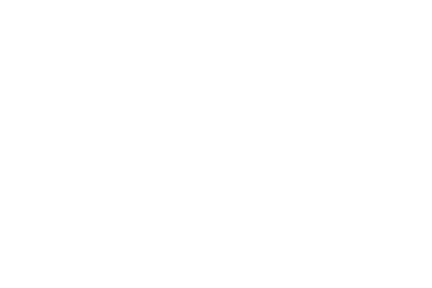

<IPython.core.display.Javascript object>


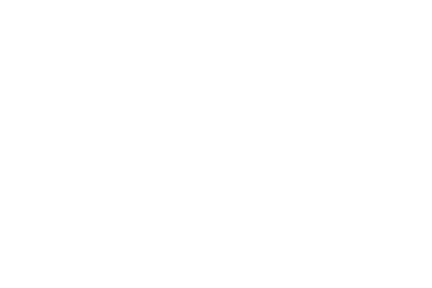

In [43]:
#Visually looking into the results

import mglearn

gridresults = pd.DataFrame(gridsearch.cv_results_)
%matplotlib notebook
scores = np.array(gridresults.mean_test_score).reshape(4, 4)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [60]:
scores

array([[-0.07700099, -0.07144226, -0.07117928, -0.07176196],
       [-0.05257206, -0.00341715,  0.03235152, -0.04400575],
       [ 0.09834191,  0.25858091,  0.15358599,  0.02357067],
       [ 0.5806958 ,  0.39859983,  0.24850196,  0.12796037]])

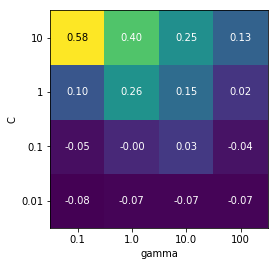

In [62]:
#This graph was replotted after the full execution since it did not come out the first time
# plot the mean cross-validation scores
param_grid = {'C':[0.01, 0.1, 1, 10], 'gamma':[0.1, 1.0, 10.0, 100]}
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [44]:
#Now we will cross validate the model with Best Parameters to see the model generalization
crossval_scores = cross_val_score(SVR(kernel='rbf', C=bestCforKernelSVR, gamma=bestgammaforKernelSVR), X_full_scaled, y, cv=5)
crossvalreport = crossvalreport + [[model_name,best_parameters,crossval_scores[0],crossval_scores[1], crossval_scores[2],
                   crossval_scores[3], crossval_scores[4], crossval_scores.mean()]]

In [45]:
#This is the cross validation report
crossvalreportdf = pd.DataFrame(crossvalreport, columns=['Model', 'Best Parameters', 'Cross Val Score1', 'Cross Val Score2','Cross Val Score3','Cross Val Score4','Cross Val Score5', 'Mean CrossVal Score']).set_index('Model', drop=True)
crossvalreportdf

,Best Parameters,Cross Val Score1,Cross Val Score2,Cross Val Score3,Cross Val Score4,Cross Val Score5,Mean CrossVal Score
Model,,,,,,,
LinearRegression,N/A,0.943257,0.943529,0.964191,0.929229,0.931706,0.942382
RidgeRegression,{'alpha': 0.1},0.940950,0.940408,0.966779,0.927748,0.934547,0.942086
LassoRegression,{'alpha': 0.01},0.941164,0.942607,0.968584,0.930204,0.935457,0.943603
SupportVectorRegression,{'C': 1000},0.933420,0.922307,0.937302,0.900752,0.927230,0.924202
KernelSVR,"{'C': 10, 'gamma': 0.1}",0.623025,0.662433,0.360288,0.480172,0.666818,0.558547


In [46]:
writer = ExcelWriter('CrossValidationReport.xlsx')
crossvalreportdf.to_excel(writer,'Sheet1')
writer.save()

# KNN Regression

In [47]:
model_name = 'KNNRegression'

knnreg =  KNeighborsRegressor()
param_grid = {'n_neighbors':[1, 3, 5, 10, 20]}
grid_search = GridSearchCV(knnreg, param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)
train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)

In [48]:
best_parameters = str(grid_search.best_params_)
print("Best parameters: {}".format(grid_search.best_params_))
knnregress_best = grid_search.best_params_['n_neighbors']
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]

#Appending the model specific report
report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
writer = ExcelWriter('RegressionReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

Best parameters: {'n_neighbors': 3}


,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression,N/A,0.943914,0.965617
RidgeRegression,{'alpha': 0.1},0.943151,0.964527
LassoRegression,{'alpha': 0.01},0.942931,0.965217
SupportVectorRegression,{'C': 1000},0.933516,0.957628
KernelSVR,"{'C': 10, 'gamma': 0.1}",0.586895,0.418031
KNNRegression,{'n_neighbors': 3},0.953086,0.839912


Text(0,0.5,'MSE')

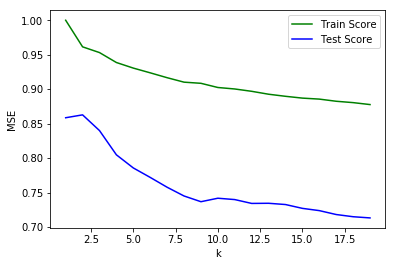

In [49]:
#Visualizing the ideal parameters

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1, 20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [50]:
#Now we will cross validate the model with Best Parameters to see the model generalization
crossval_scores = cross_val_score(KNeighborsRegressor(knnregress_best), X_full_scaled, y, cv=5)
crossvalreport = crossvalreport + [[model_name,best_parameters,crossval_scores[0],crossval_scores[1], crossval_scores[2],
                   crossval_scores[3], crossval_scores[4], crossval_scores.mean()]]

In [51]:
#This is the cross validation report
crossvalreportdf = pd.DataFrame(crossvalreport, columns=['Model', 'Best Parameters', 'Cross Val Score1', 'Cross Val Score2','Cross Val Score3','Cross Val Score4','Cross Val Score5', 'Mean CrossVal Score']).set_index('Model', drop=True)
crossvalreportdf

,Best Parameters,Cross Val Score1,Cross Val Score2,Cross Val Score3,Cross Val Score4,Cross Val Score5,Mean CrossVal Score
Model,,,,,,,
LinearRegression,N/A,0.943257,0.943529,0.964191,0.929229,0.931706,0.942382
RidgeRegression,{'alpha': 0.1},0.940950,0.940408,0.966779,0.927748,0.934547,0.942086
LassoRegression,{'alpha': 0.01},0.941164,0.942607,0.968584,0.930204,0.935457,0.943603
SupportVectorRegression,{'C': 1000},0.933420,0.922307,0.937302,0.900752,0.927230,0.924202
KernelSVR,"{'C': 10, 'gamma': 0.1}",0.623025,0.662433,0.360288,0.480172,0.666818,0.558547
KNNRegression,{'n_neighbors': 3},0.890418,0.895667,0.827322,0.821956,0.912164,0.869506


In [52]:
writer = ExcelWriter('CrossValidationReport.xlsx')
crossvalreportdf.to_excel(writer,'Sheet1')
writer.save()

# Polynomial Regression

In [53]:
#For Polynomial Regression we have to first build estimator function to use in Grid Search CV
#Ref:-https://austinrochford.com/posts/2013-12-12-polynomial-regression-cross-validation.html

model_name = 'PolynomialRegression'
#Defining the Polynomial Regression Function
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(1,3)}
gridsearch = GridSearchCV(PolynomialRegression(), param_grid, cv=5, n_jobs=-1)
gridsearch.fit(X_train, y_train)
train_score = gridsearch.score(X_train, y_train)
test_score = gridsearch.score(X_test, y_test)

In [54]:
best_parameters = str(gridsearch.best_params_)
print("Best parameters: {}".format(gridsearch.best_params_))
bestpolydegree = gridsearch.best_params_['polynomialfeatures__degree']

#Appending the main report list
report_table = report_table + [[model_name, best_parameters, train_score, test_score]]

#Appending the model specific report
report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy']).set_index('Model', drop=True)
writer = ExcelWriter('RegressionReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

Best parameters: {'polynomialfeatures__degree': 1}


,Best Parameters,Train accuracy,Test accuracy
Model,,,
LinearRegression,N/A,0.943914,0.965617
RidgeRegression,{'alpha': 0.1},0.943151,0.964527
LassoRegression,{'alpha': 0.01},0.942931,0.965217
SupportVectorRegression,{'C': 1000},0.933516,0.957628
KernelSVR,"{'C': 10, 'gamma': 0.1}",0.586895,0.418031
KNNRegression,{'n_neighbors': 3},0.953086,0.839912
PolynomialRegression,{'polynomialfeatures__degree': 1},0.943914,0.965617


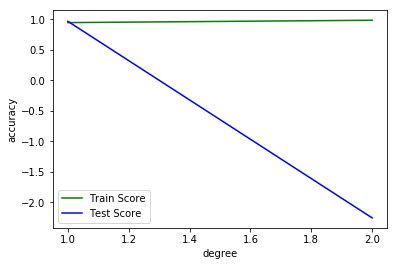

In [55]:
#To visualize the results we develop the graph like
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))


%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [56]:
#Now we will cross validate the model with Best Parameters to see the model generalization
crossval_scores = cross_val_score(PolynomialRegression(degree=bestpolydegree), X_full_scaled, y, cv=5)
crossvalreport = crossvalreport + [[model_name,best_parameters,crossval_scores[0],crossval_scores[1], crossval_scores[2],
                   crossval_scores[3], crossval_scores[4], crossval_scores.mean()]]

In [57]:
#This is the cross validation report
crossvalreportdf = pd.DataFrame(crossvalreport, columns=['Model', 'Best Parameters', 'Cross Val Score1', 'Cross Val Score2','Cross Val Score3','Cross Val Score4','Cross Val Score5', 'Mean CrossVal Score']).set_index('Model', drop=True)
crossvalreportdf

,Best Parameters,Cross Val Score1,Cross Val Score2,Cross Val Score3,Cross Val Score4,Cross Val Score5,Mean CrossVal Score
Model,,,,,,,
LinearRegression,N/A,0.943257,0.943529,0.964191,0.929229,0.931706,0.942382
RidgeRegression,{'alpha': 0.1},0.940950,0.940408,0.966779,0.927748,0.934547,0.942086
LassoRegression,{'alpha': 0.01},0.941164,0.942607,0.968584,0.930204,0.935457,0.943603
SupportVectorRegression,{'C': 1000},0.933420,0.922307,0.937302,0.900752,0.927230,0.924202
KernelSVR,"{'C': 10, 'gamma': 0.1}",0.623025,0.662433,0.360288,0.480172,0.666818,0.558547
KNNRegression,{'n_neighbors': 3},0.890418,0.895667,0.827322,0.821956,0.912164,0.869506
PolynomialRegression,{'polynomialfeatures__degree': 1},0.943257,0.943529,0.964191,0.929229,0.931706,0.942382


In [58]:
writer = ExcelWriter('CrossValidationReport.xlsx')
crossvalreportdf.to_excel(writer,'Sheet1')
writer.save()

# The report is exported to Excel for Analysis

##### Model Selection

Now as per our cross-validation scores we can straightaway reject Kernel Support Vector Regression and KNN Regression. Looking at the training and test scores as well as the cross validation generalization scores it seems that Lasso Regression will be a suitable model. Since we have 77 features, by Lasso regression we can eliminate many of them as well

##### Running the Lasso Regression Model with Full Data and predicting Twitter Buzz

In [82]:
fulldata = pd.read_table('Twitter.data', sep=',')

In [83]:
columnnames = ['NCD_0',
'NCD_1',
'NCD_2',
'NCD_3',
'NCD_4',
'NCD_5',
'NCD_6',
'AI_0',
'AI_1',
'AI_2',
'AI_3',
'AI_4',
'AI_5',
'AI_6',
'AS(NA)_0',
'AS(NA)_1',
'AS(NA)_2',
'AS(NA)_3',
'AS(NA)_4',
'AS(NA)_5',
'AS(NA)_6',
'BL_0',
'BL_1',
'BL_2',
'BL_3',
'BL_4',
'BL_5',
'BL_6',
'NAC_0',
'NAC_1',
'NAC_2',
'NAC_3',
'NAC_4',
'NAC_5',
'NAC_6',
'AS(NAC)_0',
'AS(NAC)_1',
'AS(NAC)_2',
'AS(NAC)_3',
'AS(NAC)_4',
'AS(NAC)_5',
'AS(NAC)_6',
'CS_0',
'CS_1',
'CS_2',
'CS_3',
'CS_4',
'CS_5',
'CS_6',
'AT_0',
'AT_1',
'AT_2',
'AT_3',
'AT_4',
'AT_5',
'AT_6',
'NA_0',
'NA_1',
'NA_2',
'NA_3',
'NA_4',
'NA_5',
'NA_6',
'ADL_0',
'ADL_1',
'ADL_2',
'ADL_3',
'ADL_4',
'ADL_5',
'ADL_6',
'NAD_0',
'NAD_1',
'NAD_2',
'NAD_3',
'NAD_4',
'NAD_5',
'NAD_6',
'NAD']

In [84]:
fulldata.columns = columnnames

X = fulldata.iloc[ : ,0:77]
y = fulldata.iloc[ : ,77:78]

In [85]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0)

#We choose the MinMaxScaler to scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [86]:
from sklearn.linear_model import Lasso

param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000]}
gridsearch = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
gridsearch.fit(X_train, y_train)
fulldata_trainscore = gridsearch.score(X_train, y_train)
fulldata_testscore = gridsearch.score(X_test, y_test)
print("Best parameters: {}".format(gridsearch.best_params_))

Best parameters: {'alpha': 0.01}


In [87]:
print("Full Data Train Score - Lasso: {}".format(fulldata_trainscore))
print("Full Data Test Score - Lasso: {}".format(fulldata_testscore))

Full Data Train Score - Lasso: 0.9400033657400212
Full Data Test Score - Lasso: 0.9147693979034992


##### It is confirmed for the whole dataset that alpha = 0.01 is the best parameter

##### Taking a glimpse of the values

In [91]:
predicted_values = pd.Series(gridsearch.predict(X_test))

In [92]:
predicted_values

0           11.044979
1           88.310209
2          246.172366
3           49.033762
4           80.319874
5          167.915033
6           12.057567
7          239.258896
8            7.989277
9            8.698654
10         374.166039
11          12.597631
12           8.702823
13          89.760394
14          -2.737294
15          12.613728
16        5048.363808
17          27.911868
18          47.290526
19          21.912602
20         305.310783
21         156.814495
22          37.316184
23           6.545793
24          60.443072
25         645.810280
26          12.781084
27         172.857510
28          18.835858
29          71.127135
             ...     
145783    3602.724661
145784      40.260739
145785       9.459060
145786     231.288414
145787       8.814898
145788       7.101954
145789      80.366504
145790      16.043676
145791     899.174933
145792      13.984353
145793     151.338326
145794       7.494615
145795      12.526692
145796     389.242710
145797    

In [93]:
y_test['NAD_Pred'] = predicted_values.values

In [94]:
#Let's take a random sample of 5000 and see how much similar/dissimilar the actual abd the predicted NAD values are

y_test.sample(5000)

,NAD,NAD_Pred
560850,5.0,6.989928
21949,3.0,6.886854
85148,79.0,82.714779
498921,1.0,8.276590
462226,214.5,17.202228
39731,11.0,40.967705
340614,17.0,13.540432
112750,10.0,14.499589
340089,1910.0,1616.201339
292994,0.0,1.192938


###### Examining the co-efficients we can see that many of them have been eliminated or reduced to zero

In [96]:
print(gridsearch.best_estimator_.coef_)

[ 4.37619257e+02  8.20008887e+02  1.15693612e+03  2.41644288e+03
  0.00000000e+00  0.00000000e+00  6.36459652e+04 -8.57509643e+02
 -5.56619637e+02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  5.49734031e+03  3.35472701e+03
  4.91952378e+02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -2.54041715e+04  4.87948841e-01  6.93793303e-01  2.31544963e-01
  2.36726804e+00  6.06233634e+00  4.95618092e+00  1.32219535e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.45582433e+02
 -0.00000000e+00  1.55952170e+03  1.16134355e+03  4.57045768e+02
 -0.00000000e+00 -1.22785091e+03 -0.00000000e+00 -5.56183947e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -2.12348403e+03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000

##### Visualizing the Lasso Plot

Text(0.5,0,'RM')

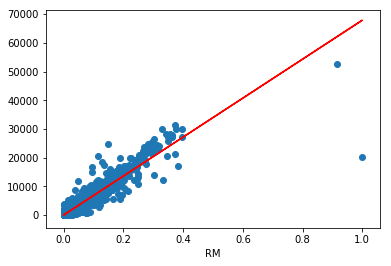

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,76].reshape(-1,1)
X_test_rm = X_test[:,76].reshape(-1,1)
gridsearch.fit(X_train_rm, y_train)
y_predict = gridsearch.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

###### Comprehensive Regression Report

We begin by analyzing the dataset to see any missing values and to check whether all the features are numerical in order to run our machine learning models. When the data seems fine, we select GridSearchCV for evaluating the correct parameter for Linear Regression, Polynomial Regression, Ridge Regression, Lasso Regression, Linear Support Vector Regression, Support Vector Regression with Kernel trick and finally KNN Nearest Neighbor Regression. After our analysis of training and test scores of various models and also the cross validation scores, we decided that Lasso Regression was the best model to go with as its generalization was bit better than other models having the same training and test scores. 

We ran Lasso Regression on whole dataset, using GridSearchCV again to confirm the best parameter and found a decent fit. We examined the co-efficient values and many of them have been reduced to zero as per the Lasso properties. Overall, looking at the plot, this seems a proper fit.